In [10]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit import Parameter

theta11 = Parameter('p11')
theta21 = Parameter('p21')
theta31 = Parameter('p31')
theta41 = Parameter('p41')
layer1 = [theta11,theta21,theta31,theta41]

theta12 = Parameter('p12')
theta22 = Parameter('p22')
theta32 = Parameter('p32')
theta42 = Parameter('p42')
layer2 = [theta12,theta22,theta32,theta42]

theta13 = Parameter('p13')
theta23 = Parameter('p23')
theta33 = Parameter('p33')
theta43 = Parameter('p43')
layer3 = [theta13,theta23,theta33,theta43]

theta14 = Parameter('p14')
theta24 = Parameter('p24')
theta34 = Parameter('p34')
theta44 = Parameter('p44')
layer4 = [theta14,theta24,theta34,theta44]

theta15 = Parameter('p15')
theta25 = Parameter('p25')
theta35 = Parameter('p35')
theta45 = Parameter('p45')
layer5 = [theta15,theta25,theta35,theta45]

theta16 = Parameter('p16')
theta26 = Parameter('p26')
theta36 = Parameter('p36')
theta46 = Parameter('p46')
layer6 = [theta16,theta26,theta36,theta46]

theta17 = Parameter('p17')
theta27 = Parameter('p27')
theta37 = Parameter('p37')
theta47 = Parameter('p47')
layer7 = [theta17,theta27,theta37,theta47]

theta18 = Parameter('p18')
theta28 = Parameter('p28')
theta38 = Parameter('p38')
theta48 = Parameter('p48')
layer8 = [theta18,theta28,theta38,theta48]

theta19 = Parameter('p19')
theta29 = Parameter('p29')
theta39 = Parameter('p39')
theta49 = Parameter('p49')
layer9 = [theta19,theta29,theta39,theta49]

layers = [layer1,layer2,layer3,layer4,layer5,layer6,layer7,layer8,layer9]

alpha1 = Parameter('p1')
alpha2 = Parameter('p2')
alpha3 = Parameter('p3')
alpha4 = Parameter('p4')
alpha5 = Parameter('p5')
alpha6 = Parameter('p6')
alphas = [alpha1,alpha2,alpha3,alpha4,alpha5,alpha6]

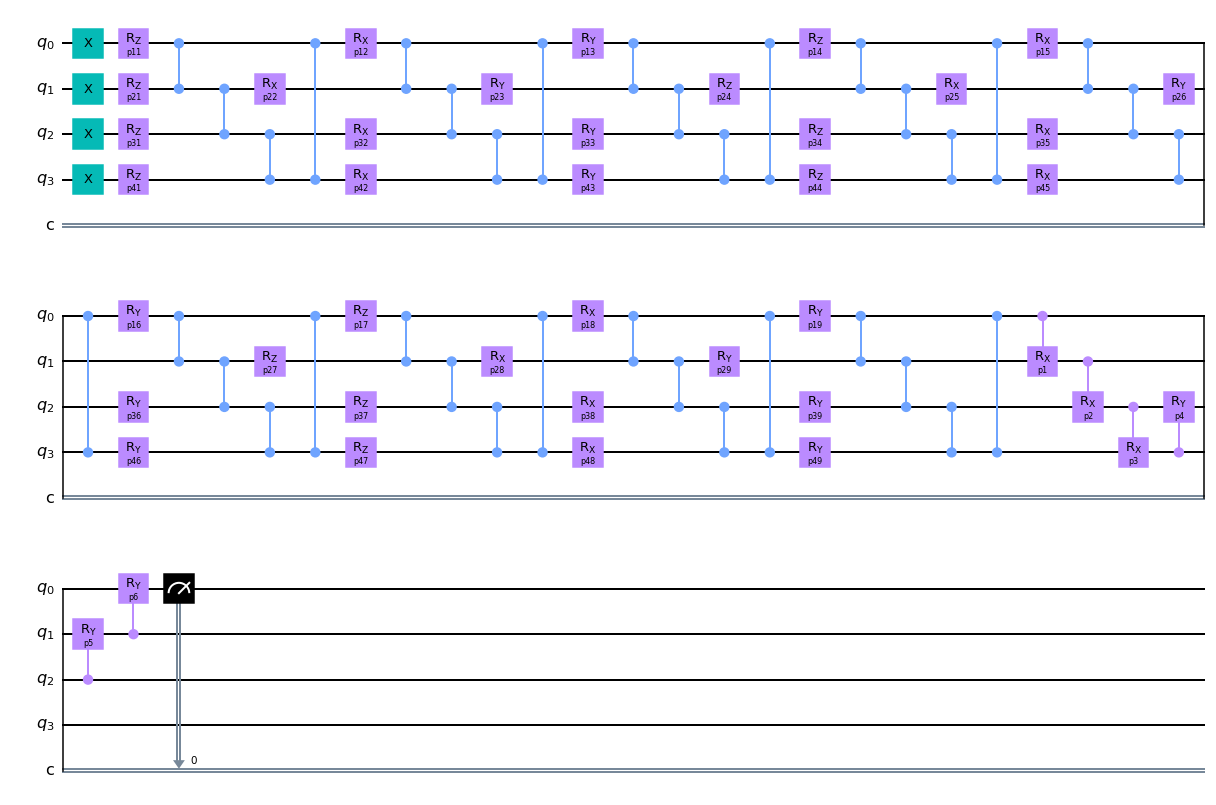

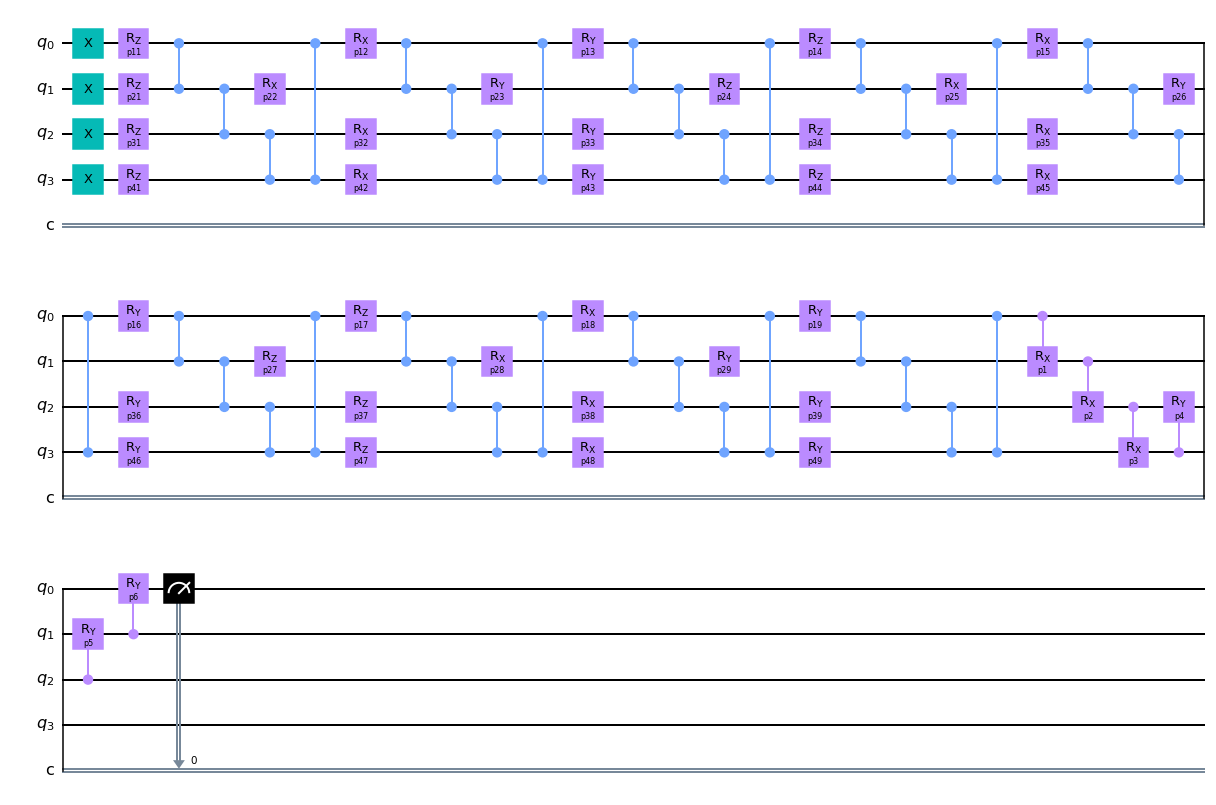

In [13]:
# create a quantum 4-layer-circuit and simulate input states by appending not-gates to the front
qc00 = QuantumCircuit(4, 1)
qc01 = QuantumCircuit(4, 1)
qc02 = QuantumCircuit(4, 1)
qc03 = QuantumCircuit(4, 1)
qc04 = QuantumCircuit(4, 1)
qc05 = QuantumCircuit(4, 1)
qc06 = QuantumCircuit(4, 1)
qc07 = QuantumCircuit(4, 1)

qc08 = QuantumCircuit(4, 1)
qc09 = QuantumCircuit(4, 1)
qc10 = QuantumCircuit(4, 1)
qc11 = QuantumCircuit(4, 1)
qc12 = QuantumCircuit(4, 1)
qc13 = QuantumCircuit(4, 1)
qc14 = QuantumCircuit(4, 1)
qc15 = QuantumCircuit(4, 1)
qcs = [qc00,qc01,qc02,qc03,qc04,qc05,qc06,qc07,qc08,qc09,qc10,qc11,qc12,qc13,qc14,qc15]

for i in range(2):
    qcs[i*8+1].x(0)
    qcs[i*8+2].x(1)
    qcs[i*8+3].x(0)
    qcs[i*8+3].x(1)
    qcs[i*8+4].x(2)
    qcs[i*8+5].x(0)
    qcs[i*8+5].x(2)
    qcs[i*8+6].x(1)
    qcs[i*8+6].x(2)
    qcs[i*8+7].x(0)
    qcs[i*8+7].x(1)
    qcs[i*8+7].x(2)

for i in range(8):
    qcs[i+8].x(3)

for i in range(16):
    for j in range(3):
        tLayer = layers[3*j]
        qcs[i].rz(tLayer[0],0)
        qcs[i].rz(tLayer[1],1)
        qcs[i].rz(tLayer[2],2)
        qcs[i].rz(tLayer[3],3)
        qcs[i].cz(0,1)
        qcs[i].cz(1,2)
        qcs[i].cz(2,3)
        qcs[i].cz(3,0)

        tLayer = layers[3*j+1]
        qcs[i].rx(tLayer[0],0)
        qcs[i].rx(tLayer[1],1)
        qcs[i].rx(tLayer[2],2)
        qcs[i].rx(tLayer[3],3)
        qcs[i].cz(0,1)
        qcs[i].cz(1,2)
        qcs[i].cz(2,3)
        qcs[i].cz(3,0)

        tLayer = layers[3*j+2]
        qcs[i].ry(tLayer[0],0)
        qcs[i].ry(tLayer[1],1)
        qcs[i].ry(tLayer[2],2)
        qcs[i].ry(tLayer[3],3)
        qcs[i].cz(0,1)
        qcs[i].cz(1,2)
        qcs[i].cz(2,3)
        qcs[i].cz(3,0)
    
    qcs[i].crx(alphas[0],0,1)
    qcs[i].crx(alphas[1],1,2)
    qcs[i].crx(alphas[2],2,3)
    qcs[i].cry(alphas[3],3,2)
    qcs[i].cry(alphas[4],2,1)
    qcs[i].cry(alphas[5],1,0)
    qcs[i].measure(range(1), range(1))

#qcs[15].draw()

In [29]:
# algorithm part, similar to gradient decent method
shots = 64
def counts2P(counts):
    p0 = counts.get('0')
    p1 = counts.get('1')
    r = [0,0]
    if p0 != None:
        r[0] = p0/shots
    if p1 != None:
        r[1] = p1/shots
    return r

def runCircuitReturnCounts(qc,parameters):
    dic = {}
    for i in range(9):
        for j in range(4):
            dic[layers[i][j]] = parameters[i*4 + j]
        
    for i in range(6):
        dic[alphas[i]] = parameters[36+i]
    
    circuitToRun = qc.bind_parameters(dic)
    job = execute(circuitToRun, backend=BasicAer.get_backend('qasm_simulator'),shots = shots)
    result = job.result()
    return result.get_counts()

def runCircuitReturnP(qc,thetas):
    return counts2P(runCircuitReturnCounts(qc,thetas))

def runCircuitReturnError(qc,thetas,target):
    p = runCircuitReturnP(qc,thetas)
    error = 1 - p[target]
    return error

def getGradient(qc,thetas,target):
    temp1 = thetas.copy()
    temp2 = thetas.copy()
    gradient = np.zeros(len(thetas))
    
    for i in range(len(thetas)):
        temp1[i] = temp1[i]+pi/4
        temp2[i] = temp2[i]-pi/4
        gradient[i] = runCircuitReturnError(qc,temp1,target) - runCircuitReturnError(qc,temp2,target)
        temp1[i] = temp1[i]-pi/4
        temp2[i] = temp2[i]+pi/4
    return gradient

def getTarget(init,goalOutput):
    t = 0
    if goalOutput[0] != init[0]:
        t = t + 8
    if goalOutput[1] != init[1]:
        t = t + 4
    if goalOutput[2] != init[2]:
        t = t + 2
    if goalOutput[3] != init[3]:
        t = t + 1
    r = np.zeros[16]
    r[t] = 1
    return r

def string2Int(s):
    i = 0
    if s[0] != '0':
        i = i + 1
    return i

def string2Int4(s):
    i = 0
    if s[0] != '0':
        i = i + 8
    if s[1] != '0':
        i = i + 4
    if s[2] != '0':
        i = i + 2
    if s[3] != '0':
        i = i + 1
    return i

def learnOnce(thetas,data,learningRate,showError):
    qcCount = string2Int4(data[0])
    if showError:
        print('Error: ', end = '')
        print(runCircuitReturnError(qcs[qcCount],thetas,string2Int(data[1])))
    gradient = getGradient(qcs[qcCount],thetas,string2Int(data[1]))
    
    for i in range(len(thetas)):
        thetas[i] = thetas[i] - learningRate*gradient[i]
    return None

# in an iteration  step, each data pair will be learned once
def letsLearn(thetas,learningTimes,learningRate,showError):
    for i in range(learningTimes):
        print('this is step ' + str(i))
        for j in range(len(dataset)):
            learnOnce(thetas,dataset[j],learningRate,showError)
    return None

In [30]:
# create database for learning: [inputState,outputState]
# you can change the dataset as you want! (Also the length is flexible)
data1 = ['0000','1']
data2 = ['0001','0']
data3 = ['0010','0']
data4 = ['0011','1']

data5 = ['0110','1']
data6 = ['0111','0']
data7 = ['0101','0']
data8 = ['1100','1']

data9 = ['1001','1']
data10 = ['1110','0']
data11 = ['1010','0']
data12 = ['1111','1']
dataset = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12]

thetas = np.zeros(42)
for i in range(42):
    thetas[i] = pi/3

LR = 0.3*pi
letsLearn(thetas,10,LR,True)

this is step 0
Error: 0.609375
Error: 0.390625
Error: 0.578125
Error: 0.109375
Error: 0.828125
Error: 0.4375
Error: 0.515625
Error: 0.53125
Error: 0.765625
Error: 0.578125
Error: 0.46875
Error: 0.46875
this is step 1
Error: 0.71875
Error: 0.515625
Error: 0.484375
Error: 0.3125
Error: 0.703125
Error: 0.46875
Error: 0.71875
Error: 0.328125
Error: 0.359375
Error: 0.296875
Error: 0.40625
Error: 0.578125
this is step 2
Error: 0.40625
Error: 0.21875
Error: 0.5625
Error: 0.375
Error: 0.375
Error: 0.3125
Error: 0.9375
Error: 0.796875
Error: 0.765625
Error: 0.671875
Error: 0.53125
Error: 0.484375
this is step 3
Error: 0.421875
Error: 0.484375
Error: 0.46875
Error: 0.375
Error: 0.46875
Error: 0.203125
Error: 0.546875
Error: 0.8125
Error: 0.421875
Error: 0.4375
Error: 0.265625
Error: 0.515625
this is step 4
Error: 0.421875
Error: 0.375
Error: 0.34375
Error: 0.265625
Error: 0.21875
Error: 0.15625
Error: 0.765625
Error: 0.765625
Error: 0.203125
Error: 0.0625
Error: 0.3125
Error: 0.8125
this is step

In [27]:
# show circuit's performance after learningprint("thetas:")
print(thetas)
print("0000->")
print(runCircuitReturnCounts(qcs[0],thetas))
print("0001->")
print(runCircuitReturnCounts(qcs[1],thetas))
print("0010->")
print(runCircuitReturnCounts(qcs[2],thetas))
print("0011->")
print(runCircuitReturnCounts(qcs[3],thetas))
print("0100->")
print(runCircuitReturnCounts(qcs[4],thetas))
print("0101->")
print(runCircuitReturnCounts(qcs[5],thetas))
print("0110->")
print(runCircuitReturnCounts(qcs[6],thetas))
print("0111->")
print(runCircuitReturnCounts(qcs[7],thetas))
print("1000->")
print(runCircuitReturnCounts(qcs[8],thetas))
print("1001->")
print(runCircuitReturnCounts(qcs[9],thetas))
print("1010->")
print(runCircuitReturnCounts(qcs[10],thetas))
print("1011->")
print(runCircuitReturnCounts(qcs[11],thetas))
print("1100->")
print(runCircuitReturnCounts(qcs[12],thetas))
print("1101->")
print(runCircuitReturnCounts(qcs[13],thetas))
print("1110->")
print(runCircuitReturnCounts(qcs[14],thetas))
print("1111->")
print(runCircuitReturnCounts(qcs[15],thetas))

thetas:
[ 0.93429657  1.10119367  0.79194315  1.18464223  0.68885964  1.57243257
  1.54788888  1.29754322  1.60679374  1.08646746  1.11101115  0.98338395
  0.0212712   1.58715879  1.55279762  1.25336457  0.90484413  0.8753917
  1.05701503  0.89502666  0.95884026  1.01283638  1.20427718  0.69867712
  1.51352771  0.03108868  1.22391214  1.5626151   1.07664998  1.56752383
  0.8753917   0.72812955  1.61661122  1.16991601  1.34172186  1.07664998
  1.22391214  0.97356647  1.13064611  1.0275626   1.0275626  -0.00327249]
0000->
{'0': 128}
0001->
{'0': 128}
0010->
{'1': 128}
0011->
{'1': 128}
0100->
{'0': 128}
0101->
{'0': 128}
0110->
{'1': 125, '0': 3}
0111->
{'1': 128}
1000->
{'0': 128}
1001->
{'0': 126, '1': 2}
1010->
{'1': 127, '0': 1}
1011->
{'1': 128}
1100->
{'0': 128}
1101->
{'0': 128}
1110->
{'1': 127, '0': 1}
1111->
{'1': 128}


In [ ]:
parameterDic = {}
parameterDic[theta11] = 1
parameterDic[theta12] = 2
parameterDic[theta13] = 3
parameterList = list(parameterDic)
print(parameterList)